## Perturbed Pendulum: Reversible Henon Maps

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import math as mt
from tensorflow import keras
from tensorflow.keras import layers
import os
import time
import wandb
import sys
import random as rd

sys.path.append("..")

from AllMethods import ReversibleSymplecticNN as rs
from AllMethods import PerturbedPendulum_Methods as pp

gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))

## $\begin{pmatrix} x \\ y \end{pmatrix} \mapsto \begin{pmatrix}y \\ -x + w_{0} + w_{1}y + w_{2}y^{2} + w_{3}y^{3} + w_{4}y^{4} \end{pmatrix}$

### Import Training Dataset

In [2]:
x, y = pp.read_dataset('x_train.txt', 'y_train.txt')

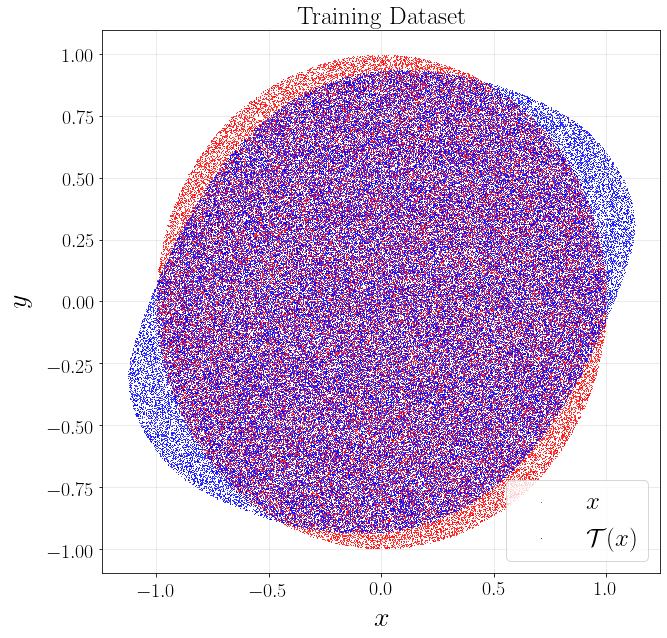

In [3]:
pp.plot_dataset(x, y)

In [4]:
len(x)

100000

### Training Dataset

In [3]:
train_dataset, val_dataset = pp.train_dataset(x, y, 10000, 10000, 10000) #val_len, train_batch, val_batch

### Model

In [58]:
model = rs.SympNet(15, 8, 'reversible')
modelH = rs.Henon(40, 'reversible')

#model.load_weights(checkpoint_path)

## Decaying Learning Rate

In [59]:
# DECAYING LEARNING RATE
def scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr*tf.math.exp(-0.001)
    
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

### Checkpoints

In [60]:
checkpoint_path = "checkpoints/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 save_best_only=True,
                                                 verbose=1)

In [61]:
model.compile(
    loss= tf.keras.losses.MeanSquaredError(),
    #optimizer=tfps.optimizers.bfgs_minimize(), #clipvalue = 0.001),
    #optimizer=keras.optimizers.SGD(0.00001), #, clipvalue = 0.001),
    optimizer=keras.optimizers.Adam(0.001), #, clipvalue = 0.001),
    metrics=["accuracy"],
)

In [62]:
#wandb.init()
start_time = time.time()
history = model.fit(train_dataset, epochs = 1, validation_data=val_dataset, callbacks=[callback, cp_callback], verbose=1)
print("running time : %s seconds" % (time.time() - start_time))

9/9 [==============================] - 31s 2s/step - loss: 1.0116 - accuracy: 0.0812 - val_loss: 0.9944 - val_accuracy: 0.0894

Epoch 00001: val_loss improved from inf to 0.99441, saving model to checkpoints\cp.ckpt
running time : 31.104778289794922 seconds


In [63]:
model.summary()

Model: "symp_net_r_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
activation_module_up_r_125 ( multiple                  1         
_________________________________________________________________
bias_245 (bias)              multiple                  2         
_________________________________________________________________
linear_module_up_r_980 (line multiple                  1         
_________________________________________________________________
linear_module_low_r_980 (lin multiple                  1         
_________________________________________________________________
linear_module_up_r_981 (line multiple                  1         
_________________________________________________________________
linear_module_low_r_981 (lin multiple                  1         
_________________________________________________________________
linear_module_up_r_982 (line multiple                

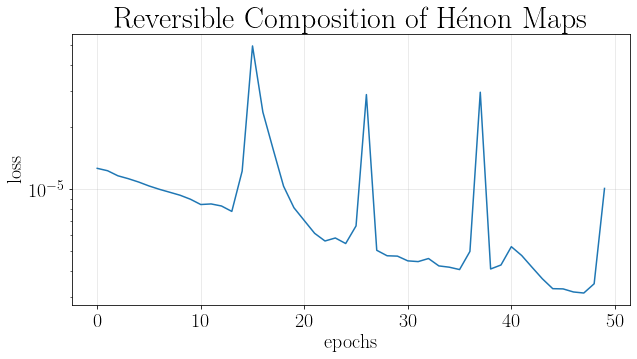

In [112]:
plt.figure(figsize = (10,5))
plt.plot(history.history["val_loss"])
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.title(r'Reversible Composition of H\'enon Maps', fontsize = 30)
plt.xlabel(r'epochs', fontsize=20)
plt.ylabel(r'loss', fontsize=20)
plt.yscale("log")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(axis='both', alpha=.3)
#plt.savefig("loss_Henon_E01667")

### Export the training and validation loss

In [17]:
pp.export_loss(history.history["loss"], history.history["loss"], 1, False)

PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'Loss1.txt'

## Tests

In [26]:
u = model(model(model(x)))

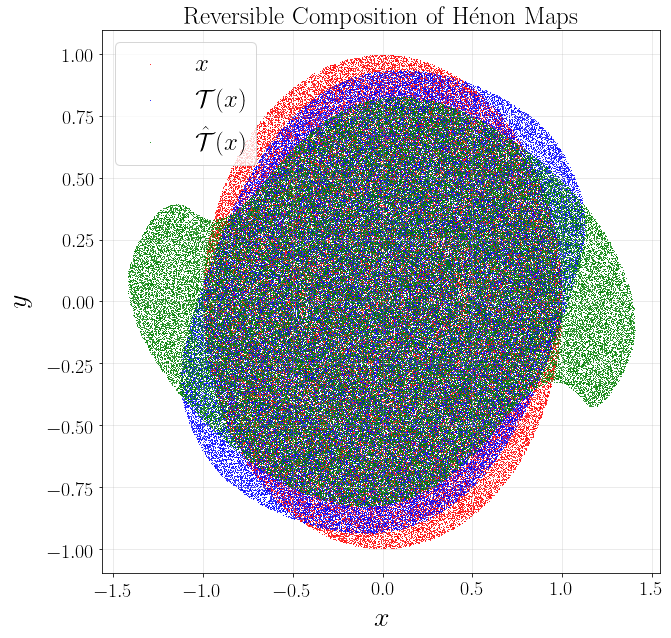

In [27]:
Nplot = Nlines

plt.figure(figsize=(10,10))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.title(r'Reversible Composition of H\'enon Maps', fontsize = 25)
plt.scatter([i[0] for i in x], [i[1] for i in x], label = r'$x$', linewidth = 0, color ='r', s=1)
plt.scatter([i[0] for i in y], [i[1] for i in y], label = r'$\mathcal{T}(x)$', linewidth = 0, color ='b', s=1)
plt.scatter([i[0].numpy() for i in u], [i[1].numpy() for i in u], label = r'$\hat{\mathcal{T}}(x)$', linewidth = 0, color ='g', s=1)
plt.xlabel(r'$x$', fontsize=28, labelpad=8)
plt.ylabel(r'$y$', fontsize=28, labelpad=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(axis='both', alpha=.3)
plt.legend(fontsize = 25)
#plt.savefig("DoublePendulum_Example")
plt.show()

### True Poincare Plot

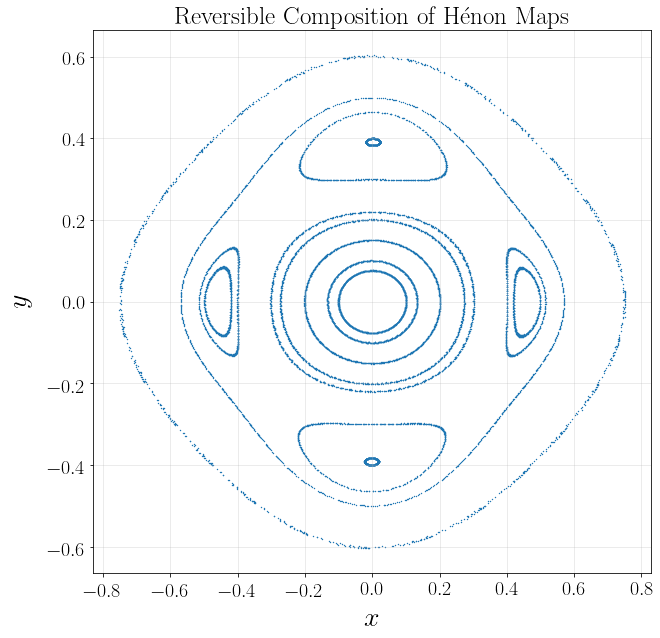

In [15]:
file = open("Poincare.txt", "r")
line_count = 0
for line in file:
    if line != "\n":
        line_count += 1
file.close()


Nlines = int(line_count/2)

Poincare_points = []

prova = open("Poincare.txt", "r")
for i in range(Nlines):
    x = float(prova.readline())
    y = float(prova.readline())
    Poincare_points.append(np.array([x,y]))
prova.close()

plt.figure(figsize=(10,10))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.title(r'Reversible Composition of H\'enon Maps', fontsize = 25)

plt.scatter([i[0] for i in Poincare_points], [i[1] for i in Poincare_points], linewidth = 0, s=2)

plt.xlabel(r'$x$', fontsize=28, labelpad=8)
plt.ylabel(r'$y$', fontsize=28, labelpad=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(axis='both', alpha=.3)
plt.show()

### Iterations

In [13]:
x0 = np.array([[0.0, 0.1],[0.0, 0.2],[0.0, 0.3],[0.0, 0.4],[0.0, 0.5],[0.0, 0.6],[0.1, 0.],[0.2, 0.],[0.3, 0.],[0.4, 0.],[0.5, 0.]])

iterations = [model(x0)]
for _ in range(200):
    iterations.append(model(iterations[-1]))

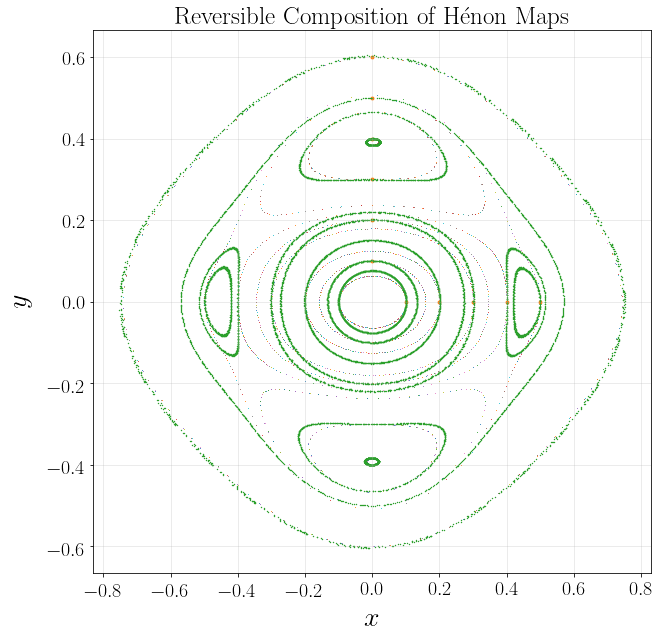

In [16]:
plt.figure(figsize=(10,10))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.title(r'Reversible Composition of H\'enon Maps', fontsize = 25)

for i in iterations:
    plt.scatter(*zip(*i.numpy()), s=1, linewidth=0)
    
plt.scatter(*zip(*x0), s=15, linewidth=0)

plt.scatter([i[0] for i in Poincare_points], [i[1] for i in Poincare_points], linewidth = 0, s=2)

plt.xlabel(r'$x$', fontsize=28, labelpad=8)
plt.ylabel(r'$y$', fontsize=28, labelpad=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(axis='both', alpha=.3)
plt.show()

### Reversibility

In [ ]:
x0 = np.array([[rd.randrange(250, 300, 1)*0.001, rd.randrange(250, 300, 1)*0.001] for _ in range(100)])

f_iterations = [model(x0)]
for _ in range(100):
    f_iterations.append(model(f_iterations[-1]))

b_iterations = [f_iterations[-1]*np.array([[1., -1.]])]

for _ in range(100):
    b_iterations.append(model(b_iterations[-1]))

In [ ]:
plt.figure(figsize=(10,10))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.title(r'SympNet', fontsize = 25)


plt.scatter(*zip(*f_iterations[0].numpy()), s=1, linewidth=0, color='r', label= r'$\hat{\mathcal{T}}^{n}[X_{0}] \qquad n=1,\dots ,100$')

for i in f_iterations:
    plt.scatter(*zip(*i.numpy()), s=1, linewidth=0, color='r')
    
#plt.scatter(*zip(*f_iterations[-1].numpy()), s=15, linewidth=0, color='r')

#plt.scatter(*zip(*b_iterations[0].numpy()), s=15, linewidth=0, color='b')

b_iterations_symm = b_iterations*np.array([[1., -1.]])

plt.scatter(*zip(*b_iterations_symm[0]), s=1, linewidth=0, color='b', label= r'$R \hat{\mathcal{T}}^{n}[R(\hat{\mathcal{T}}^{100}(X_{0}))] \qquad n=1,\dots 100$')

for i in b_iterations_symm:
    plt.scatter(*zip(*i), s=1, linewidth=0, color='b')

plt.xlabel(r'$x$', fontsize=28, labelpad=8)
plt.ylabel(r'$y$', fontsize=28, labelpad=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(axis='both', alpha=.3)
lgnd = plt.legend(scatterpoints=1, fontsize=25)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
#plt.savefig("Testing_Reversinility_NonReversible.png")
plt.show()

### Quantitative Test for Reversibility

In [ ]:
A = np.array(f_iterations)
B = np.flip(b_iterations_symm, 0)

(np.square(A - B)).mean(axis=None)

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------

### Three iterations Poincare plot

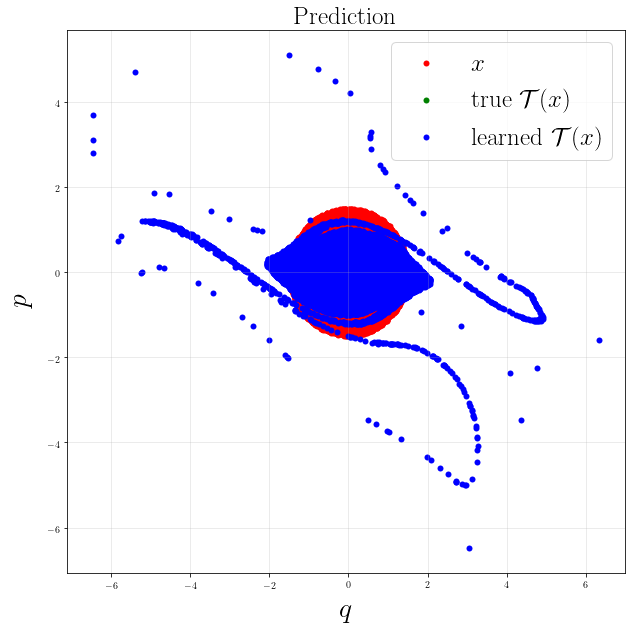

In [269]:
file = open("x_train_PPH_2iter.txt", "r")
line_count = 0
for line in file:
    if line != "\n":
        line_count += 1
file.close()


Nlines = int(line_count/2)

u0 = []

prova = open("x_train_PPH_2iter.txt", "r")
for i in range(Nlines):
    x = float(prova.readline())
    y = float(prova.readline())
    u0.append(np.array([x,y]))
prova.close()

T = []

prova = open("y_train_PPH_2iter.txt", "r")

for i in range(Nlines):
    x = float(prova.readline())
    y = float(prova.readline())
    T.append(np.array([x,y]))
prova.close()


u = model(x_train)
u = model(u)

Nplot = 10000

plt.figure(figsize=(10,10))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.title(r'Prediction', fontsize = 25)
plt.scatter([x_train[i][0] for i in range(Nplot)], [x_train[i][1] for i in range(Nplot)], label = r'$x$', linewidth = 0, color ='r')
plt.scatter([T[i][0] for i in range(len(u0))], [T[i][1] for i in range(len(u0))], label = r'true $\mathcal{T}(x)$', linewidth = 0, color = 'g')
plt.scatter([u[i][0].numpy() for i in range(Nplot)], [u[i][1].numpy() for i in range(Nplot)], label = r'learned $\mathcal{T}(x)$', linewidth = 0, color ='b')
plt.xlabel(r'$q$', fontsize=28, labelpad=8)
plt.ylabel(r'$p$', fontsize=28, labelpad=15)
plt.grid(axis='both', alpha=.3)
plt.legend(fontsize = 25)

#plt.savefig("DoublePendulum_Example")

plt.show()

### Conservation of energy

In [120]:
#x0 = np.array([[rd.randrange(-300, 300, 1)*0.001, rd.randrange(-300, 300, 1)*0.001] for _ in range(10)])
x0 = np.array([[0.0, 0.1], [0.0, 0.2],[0.0, 0.3],[0.0, 0.4],[0.0, 0.5],[0.0, 0.6],[0.1, 0.],[0.2, 0.],[0.3, 0.],[0.4, 0.],[0.5, 0.]])

f_iterations = [model(x0)]
for _ in range(100):
    f_iterations.append(model(f_iterations[-1]))

In [121]:
H = []
for iter in f_iterations:
    h = []
    for q, p in iter.numpy():
        h.append(p*p*0.5 - 0.25*np.cos(q))
    H.append(h)

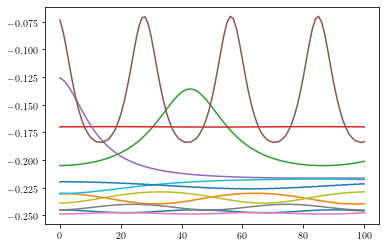

In [122]:
plt.plot(H)
plt.show()